# Dermatology Database 

 * This database contains 34 attributes, 33 of which are linear
   valued and one of them is nominal. 


 * The differential diagnosis of erythemato-squamous diseases is a real
   problem in dermatology. They all share the clinical features of
   erythema and scaling, with very little differences. The diseases in
   this group are psoriasis, seboreic dermatitis, lichen planus, 
   pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
   Usually a biopsy is necessary for the diagnosis but unfortunately
   these diseases share many histopathological features as
   well. Another difficulty for the differential diagnosis is that a
   disease may show the features of another disease at the beginning
   stage and may have the characteristic features at the following stages. 
   Patients were first evaluated clinically with 12 features.
   Afterwards, skin samples were taken for the evaluation of 22
   histopathological features. The values of the histopathological features
   are determined by an analysis of the samples under a microscope. 


 * In the dataset constructed for this domain, the family history feature
   has the value 1 if any of these diseases has been observed in the
   family, and 0 otherwise. The age feature simply represents the age of
   the patient. Every other feature (clinical and histopathological) was
   given a degree in the range of 0 to 3. Here, 0 indicates that the
   feature was not present, 3 indicates the largest amount possible,
   and 1, 2 indicate the relative intermediate values.

 * The Dataset is taken from here - [Dermatology Dataset](https://archive.ics.uci.edu/ml/datasets/dermatology)

# Steps Involved:

 1. Importing the library
 2. Loading the Dataset
 3. Structure of the Dataset
 4. Exploration of Dataset
  * Statistics
  * Data Cleaning
  * Heat Map
 5. PCA Implementation
 6. Machine learning Model
  * Splitting the Dataset
  * Training the Model
  * Prediction
  * Model Score

# 1. Importing the library

In [1]:
#Import all the required Packages like numpy ,pandas , plotting , etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Loading the Dataset 

In [2]:
#Load the dataset of Dermatology.
data=pd.read_csv('dermatology.csv')
data.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [3]:
##Applying Column Names
data.columns=['erythema','scaling','definite borders','itching','koebner phenomenon','polygonal papules','follicular papules','oral mucosal involvement','knee and elbow involvement','scalp involvement','family history','melanin incontinence','eosinophils in the infiltrate','PNL infiltrate','fibrosis of the papillary dermis','exocytosis','acanthosis','hyperkeratosis','parakeratosis','clubbing of the rete ridges','elongation of the rete ridges','thinning of the suprapapillary epidermis','spongiform pustule','munro microabcess','focal hypergranulosis','disappearance of the granular layer','vacuolisation and damage of basal layer','spongiosis','saw-tooth appearance of retes','follicular horn plug','perifollicular parakeratosis','inflammatory monoluclear inflitrate','band-like infiltrate','Age','ClassCode']

In [4]:
#Printing Col Names
data.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner phenomenon', 'polygonal papules', 'follicular papules',
       'oral mucosal involvement', 'knee and elbow involvement',
       'scalp involvement', 'family history', 'melanin incontinence',
       'eosinophils in the infiltrate', 'PNL infiltrate',
       'fibrosis of the papillary dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing of the rete ridges',
       'elongation of the rete ridges',
       'thinning of the suprapapillary epidermis', 'spongiform pustule',
       'munro microabcess', 'focal hypergranulosis',
       'disappearance of the granular layer',
       'vacuolisation and damage of basal layer', 'spongiosis',
       'saw-tooth appearance of retes', 'follicular horn plug',
       'perifollicular parakeratosis', 'inflammatory monoluclear inflitrate',
       'band-like infiltrate', 'Age', 'ClassCode'],
      dtype='object')

In [5]:
#Printing Target Value
data['ClassCode']

0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: ClassCode, Length: 365, dtype: int64

In [6]:
#Saving the target value in some other variable and print it
target_data=data['ClassCode']
target_data

0      1
1      3
2      1
3      3
4      2
      ..
360    4
361    4
362    3
363    3
364    1
Name: ClassCode, Length: 365, dtype: int64

In [7]:
#Printing the shape of the dataframe and target variable respectively
print('Shape of the Dataframe is :' ,data.shape, '| Shape of the Target variable is :', target_data.shape)

Shape of the Dataframe is : (365, 35) | Shape of the Target variable is : (365,)


In [8]:
#Printing the describe of the dataset.
data.describe()

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,ClassCode
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2.068493,1.794521,1.553425,1.361644,0.635616,0.449315,0.167123,0.378082,0.613699,0.520548,...,0.394521,0.465753,0.457534,0.947945,0.454795,0.104110,0.115068,1.868493,0.556164,2.805479
std,0.665656,0.702408,0.905126,1.136632,0.908653,0.958353,0.571304,0.835057,0.984120,0.906472,...,0.850322,0.865743,0.955884,1.126615,0.955758,0.451018,0.489357,0.725682,1.107044,1.599441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [9]:
#Checking for null value in the features
data.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [10]:
#Checking for nan value in the features.
data.isna().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner phenomenon                          0
polygonal papules                           0
follicular papules                          0
oral mucosal involvement                    0
knee and elbow involvement                  0
scalp involvement                           0
family history                              0
melanin incontinence                        0
eosinophils in the infiltrate               0
PNL infiltrate                              0
fibrosis of the papillary dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing of the rete ridges                 0
elongation of the rete ridges               0
thinning of the suprapapillary epi

In [11]:
#Calculatoing the minimum, maximum, mean, median, and Unique of 'ClassCode' by storing each calculation in their respective variable.

Min=target_data.min()

Max=target_data.max()

Mean=target_data.mean()

Median=target_data.median()

Unique=target_data.unique()

# Printing all the calculated statistics above.
ClassCode_stats_data={'Min Value of ClassCode':Min,'Max Value of ClassCode':Max,'Mean Value of ClassCode':Mean,'Median Value of ClassCode':Median,'Unique Value of ClassCode':Unique}
ClassCode_stats_data

{'Min Value of ClassCode': 1,
 'Max Value of ClassCode': 6,
 'Mean Value of ClassCode': 2.8054794520547945,
 'Median Value of ClassCode': 3.0,
 'Unique Value of ClassCode': array([1, 3, 2, 5, 4, 6], dtype=int64)}

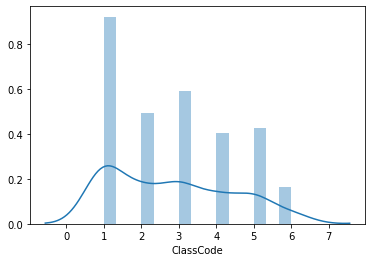

In [12]:
#Using displot from seaborn on the target value
sns.distplot(target_data,bins=15)
#OBSERVATION: This graph will show the frequency of unique values of a given variable.
#We can see that the count of different ClassCode values present in the dataset and infer that 1 has highest count and 6 has lowest count.

In [13]:
#Using value_counts on the target variable to count its value
target_data.value_counts()

1    112
3     72
2     60
5     52
4     49
6     20
Name: ClassCode, dtype: int64

In [14]:
#Checking if there are any "?" in features.
data['Age'][data['Age']=='?']

32     ?
33     ?
34     ?
35     ?
261    ?
262    ?
263    ?
264    ?
Name: Age, dtype: object

In [15]:
#Replacing '?' values with nan
data['Age']=data['Age'].replace('?',np.nan)

In [16]:
#Replacing nan with mean
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Age'].fillna(data['Age'].mean(),inplace=True)

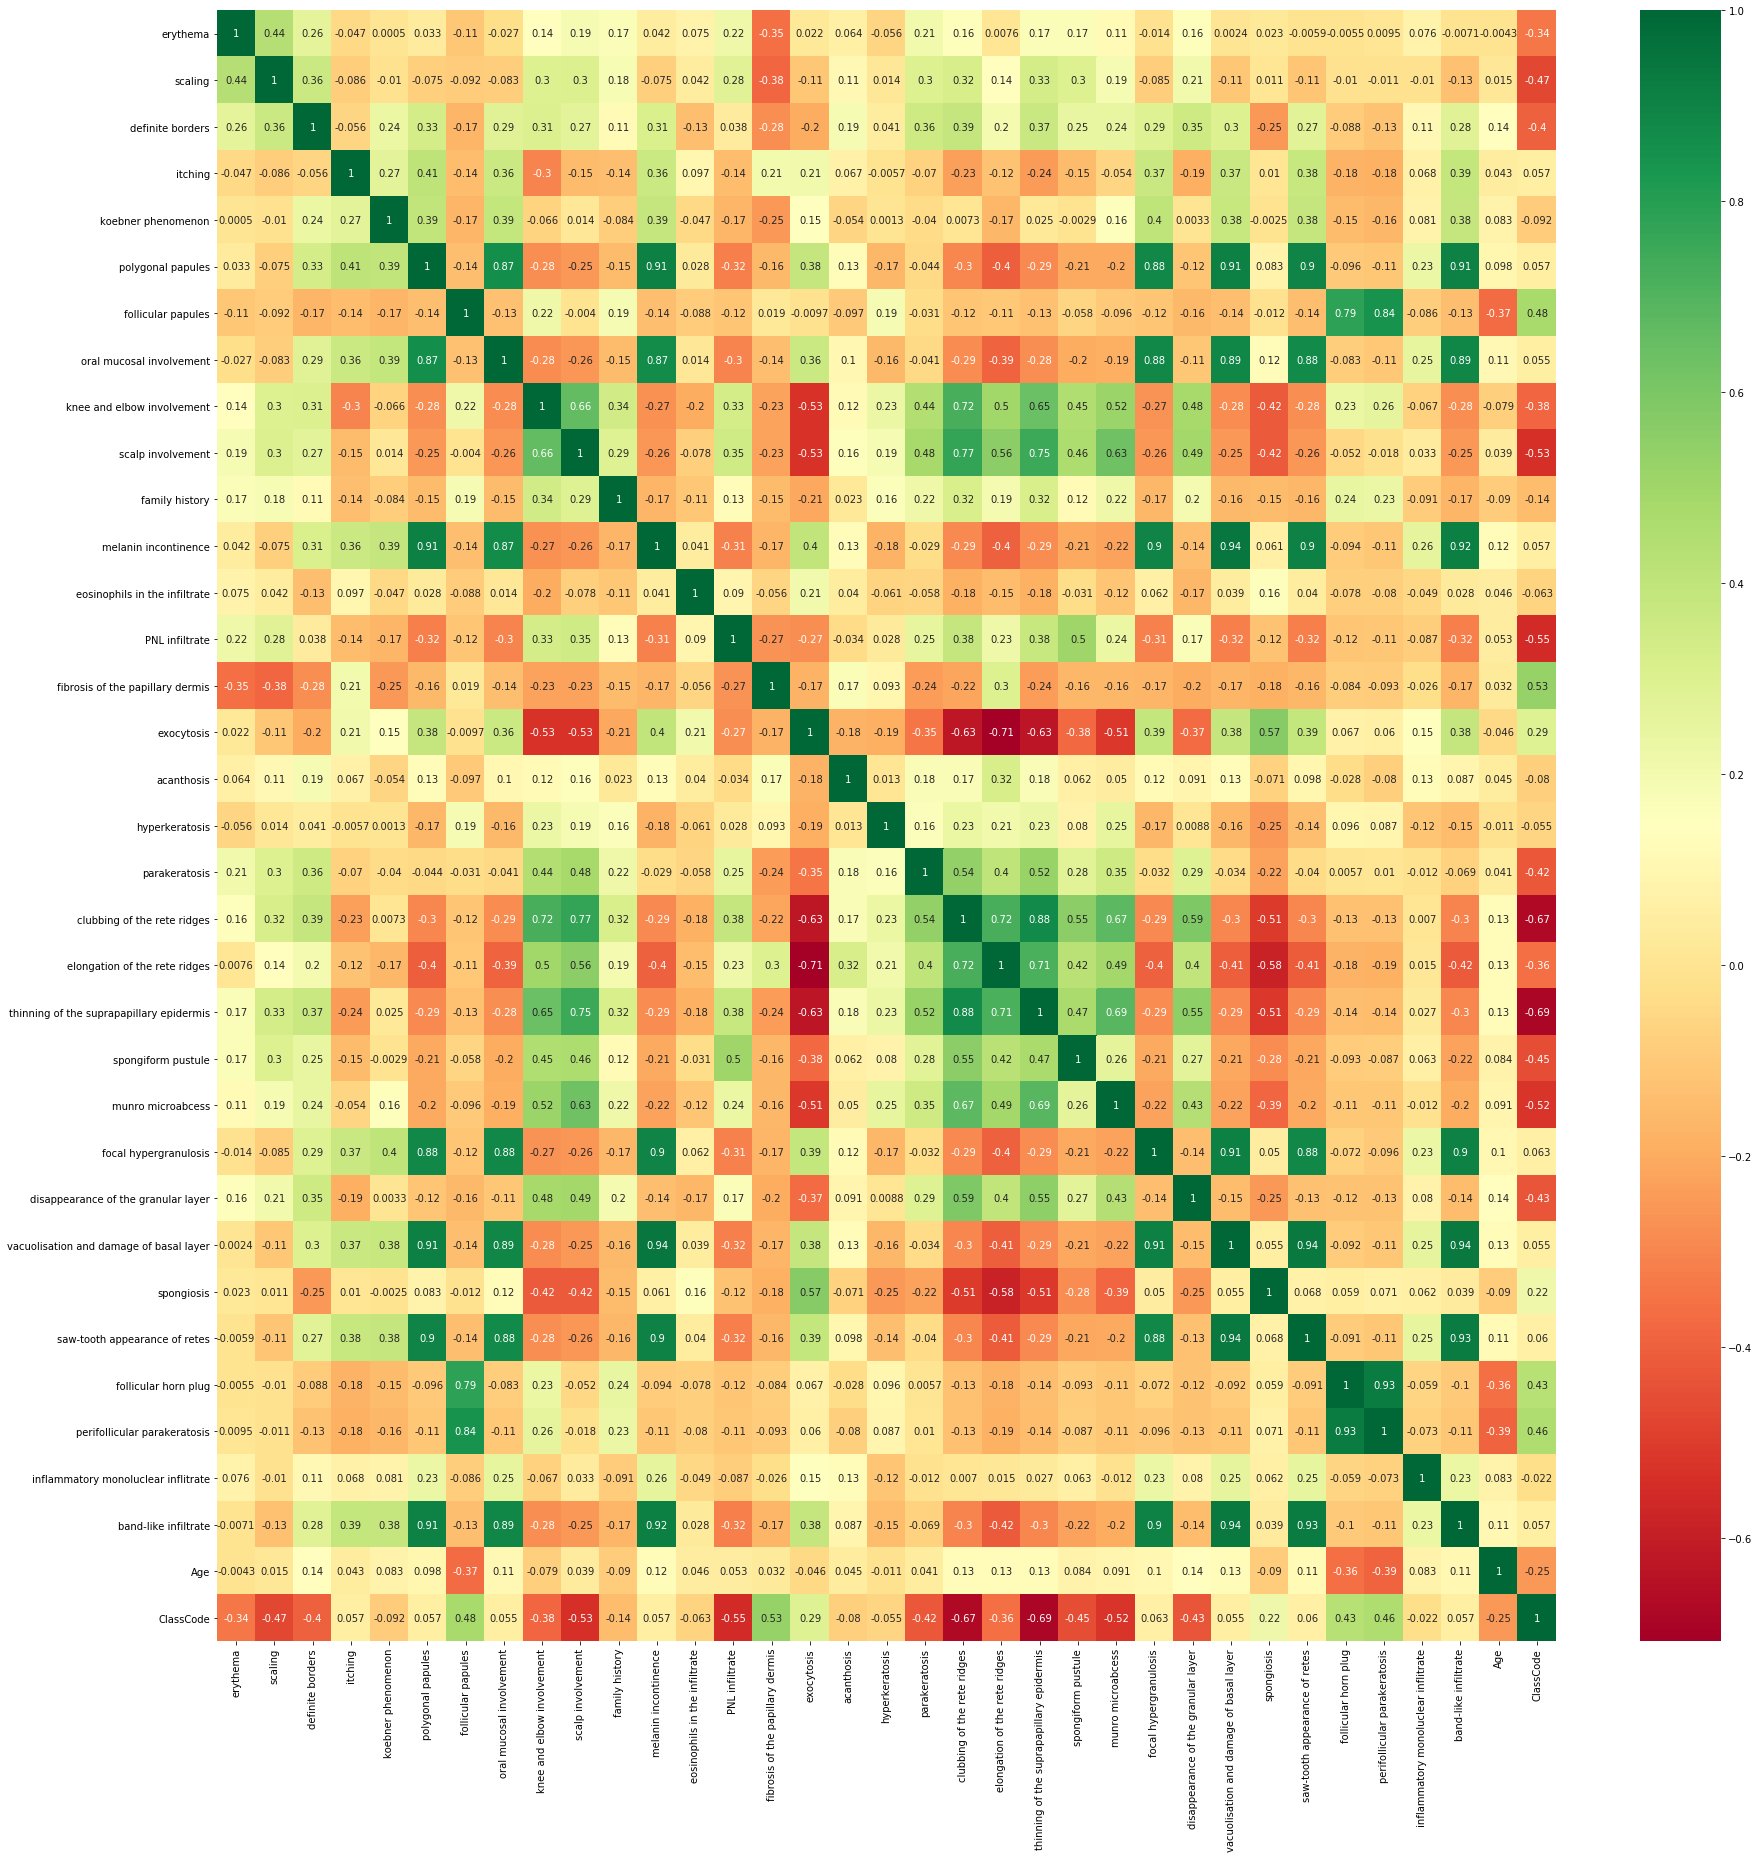

In [17]:
#Using heat map in the seaborn library to get the correlation graph.
data['Age']=data['Age'].astype('int64')
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
#Observation: The correlation coefficient ranges from -1 to 1. If the value is close to 1, 
#it means that there is a strong positive correlation between the two variables. When it is close to -1, 
#the variables have a strong negative correlation.

# PCA Implementation

In [18]:
#splitting X and y(Features and labels)
X=data.drop('ClassCode',axis=1)
y=data['ClassCode']

In [19]:
#Using the Standard Scaler to scale the data
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(X)

In [20]:
#printing the scaled_data
print(scaled_data)
scaled_data.shape

[[ 1.40130251  1.71856645  1.60039684 ... -1.19843846 -0.50307665
  -1.86712387]
 [-0.10303695 -1.13269152  0.4940619  ...  0.18146702  2.21056341
  -0.67696147]
 [-0.10303695  0.29293746  0.4940619  ...  1.56137251 -0.50307665
   0.24872039]
 ...
 [ 1.40130251  0.29293746  0.4940619  ...  0.18146702  2.21056341
  -0.54472121]
 [-0.10303695 -1.13269152  1.60039684 ...  0.18146702  2.21056341
   0.90992172]
 [ 1.40130251  0.29293746  0.4940619  ...  1.56137251 -0.50307665
  -0.08188027]]


(365, 34)

In [21]:
#Finding the covarience matrix which is : X.TX
sample_data=scaled_data # Copying the data

In [22]:
#Performing the Matrix multiplication using numpy
covar_matrix=np.matmul(sample_data.T,sample_data)

In [23]:
#Print the shape of covariance matrix
print("The shape of covariance matrix is : ",covar_matrix.shape)

The shape of covariance matrix is :  (34, 34)


In [24]:
#Finding top two eigen value and corresponding eigen vectors and print it.
#for projecting onto a 2-Dimension space.
from scipy.linalg import eigh
values,vectors=eigh(covar_matrix,eigvals=(32,33))
print("Shape of eigen vectors = ",vectors.shape)

#converting the eigen vectors into (2,d) shape for easyness of further computations.
vectors=vectors.T
print("Updated shape of eigen vectors = ",vectors.shape)

#the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
#the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (34, 2)
Updated shape of eigen vectors =  (2, 34)


In [25]:
#Projecting the original data sample on the plane.
#These are formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates=np.matmul(vectors,sample_data.T)

In [26]:
#Printing the new data point shape.
print("Resultant new data points shape ",vectors.shape,"X",sample_data.T.shape," = ",new_coordinates.shape)

Resultant new data points shape  (2, 34) X (34, 365)  =  (2, 365)


In [27]:
#Creating the Dataframe having 1st principal & 2nd principal
df=pd.DataFrame(data=new_coordinates.T,columns=['1st principle','2nd principle'])

In [28]:
#Creating new_dataframe for plotting labeled points(i.e, target variable)
df['target']=y

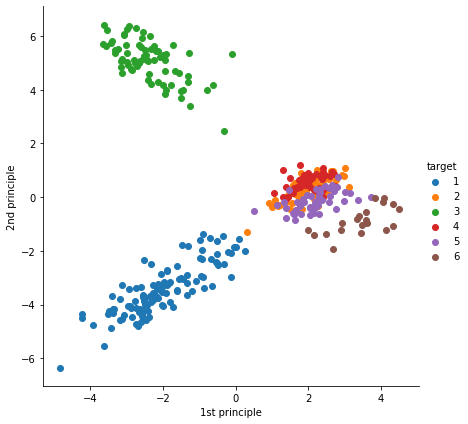

In [29]:
#Plotting the 2d data points with seaborn
sns.FacetGrid(df, hue="target", height=6).map(plt.scatter, '1st principle', '2nd principle').add_legend()
plt.show()

In [30]:
X_final=df.drop('target',axis=1)
X_final.head()

,1st principle,2nd principle
0,-1.967622,-3.175420
1,-2.084925,5.234609
2,-2.839560,-4.464595
3,-2.892147,4.770316
4,1.391410,-0.185520


## Splitting the Data

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_final,y,test_size=0.30,random_state=41,stratify=y)

In [32]:
#Printing the shape of train_data
print(X_train.shape)
print(y_train.shape)

(255, 2)
(255,)


In [33]:
#Printing the shape of test_data
print(X_test.shape)
print(y_test.shape)

(110, 2)
(110,)


## Applying SVM

In [34]:
from sklearn.svm import SVC

In [35]:
svm=SVC(kernel='poly',degree=3,gamma='auto')

## Training the Model

In [36]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing the Model

In [37]:
#Predicting the y_predict from .predict function on X_test.
y_predict=svm.predict(X_test)
y_predict

array([1, 2, 4, 6, 4, 1, 1, 4, 2, 2, 2, 4, 3, 5, 1, 1, 3, 5, 2, 1, 2, 1,
       3, 2, 1, 2, 4, 5, 2, 2, 1, 5, 1, 2, 6, 2, 1, 3, 3, 3, 6, 4, 1, 1,
       6, 5, 5, 1, 6, 2, 3, 3, 4, 1, 1, 1, 3, 5, 3, 1, 3, 3, 2, 5, 1, 1,
       1, 5, 3, 3, 5, 3, 1, 3, 3, 3, 2, 4, 3, 5, 1, 1, 5, 5, 2, 5, 2, 1,
       2, 5, 3, 2, 1, 1, 4, 2, 3, 1, 6, 1, 1, 1, 1, 2, 5, 5, 3, 5, 1, 1],
      dtype=int64)

## Model Score

In [38]:
#Printing the Model Score
svm.score(X_test,y_test)

0.8636363636363636

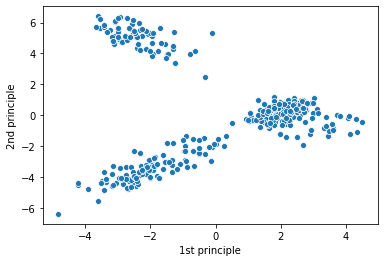

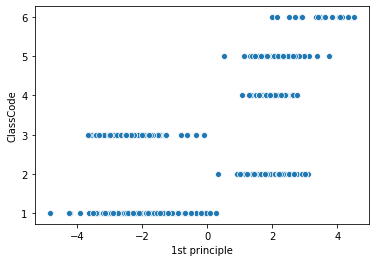

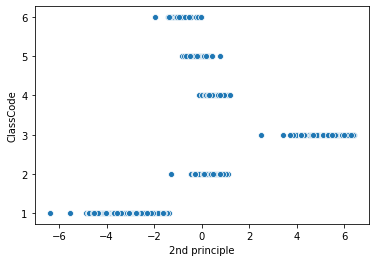

In [39]:
#Plotting the related graphs
sns.scatterplot(X_final['1st principle'],X_final['2nd principle'])
plt.show()
sns.scatterplot(X_final['1st principle'],y)
plt.show()
sns.scatterplot(X_final['2nd principle'],y)
plt.show()